# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives
At the end of the experiment, participants will be able to : 
* Understand the intution of Gradient Descent
* Implement gradient descent from scratch

## Overview 

In general terms Gradient means slope or slant of a surface. So gradient descent means descending a slope to reach the lowest point on that surface. Gradient Descent aims to minimize the cost function, a function reaches its minimum value when the slope is equal to 0. Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the minimum point of that function.

#### Importing required packages

In [ ]:
'import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Implementing  Equation --> y=3x+1  Using  Matrix Concepts 

![](https://cdn.extras.talentsprint.com/IOT/Images/St_line_into_Matrix.png)



In [ ]:
x1=np.linspace(-3,3,7)
x1

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [ ]:
y1=3*x1+1
y1

array([-8., -5., -2.,  1.,  4.,  7., 10.])

#### Calculating y for all values of x  in one shot in eqn  y = 3x + 1
#### Taking X= [-3, -2 ,  -1,   0,   1,  2,   3 ]

In [ ]:
## Making array of coefficient of y=mx+c
theta=np.array([[1],[3]]) ## theta_0(c)=1,theta_1(m)=3
print('theta :\n', theta,'\n')
print('shape of theta : ',theta.shape)

## Creating X array
x1=np.linspace(-3,3,7)
X1=x1[:,np.newaxis] ## Converting one dimensional x1 into 2D and storing inside X1
print('X1 :',X1,'\n')
X_values=np.hstack((np.ones((7,1)),X1))

print('X values In array form :\n', X_values)
print('shape of X_values array : \n', X_values.shape)

### Finally implementing y=mx+c in array format
y_values=np.dot(X_values,theta)
print('Y_Values : \n ',y_values,'\n')
print('shape of y_values : ',y_values.shape)

theta :
 [[1]
 [3]] 

shape of theta :  (2, 1)
X1 : [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]] 

X values In array form :
 [[ 1. -3.]
 [ 1. -2.]
 [ 1. -1.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]]
shape of X_values array : 
 (7, 2)
Y_Values : 
  [[-8.]
 [-5.]
 [-2.]
 [ 1.]
 [ 4.]
 [ 7.]
 [10.]] 

shape of y_values :  (7, 1)


### Importing Data 

In [ ]:
!wget https://cdn.extras.talentsprint.com/IOT/Data/data1.txt

--2022-03-20 03:48:30--  https://cdn.extras.talentsprint.com/IOT/Data/data1.txt
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘data1.txt.1’

data1.txt.1         100%[===================>]   1.33K  --.-KB/s    in 0s      

2022-03-20 03:48:33 (172 MB/s) - ‘data1.txt.1’ saved [1359/1359]



In [ ]:
data=pd.read_csv('data1.txt',header=None)
data.rename(columns={0:'Visitor_Count',1:'Revenue'},inplace=True)
data.head()

,Visitor_Count,Revenue
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Visitor_Count  97 non-null     float64
 1   Revenue        97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0, 0.5, 'Revenue in 10,000')

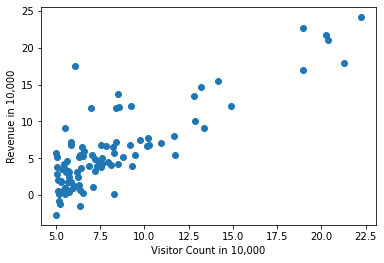

In [ ]:
plt.scatter(data.Visitor_Count,data.Revenue)
plt.xlabel('Visitor Count in 10,000')
plt.ylabel('Revenue in 10,000')

In [ ]:
data.to_excel('/content/df.xlsx') # '/content/df.xlsx'

### Separating feature X and output Y

In [ ]:
ones=np.ones((3,4))
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
## Separating feature i.e. x
x=data['Visitor_Count'].values
m=len(x)
print(m)
x=x[:,np.newaxis]
ones=np.ones((97,1))
X=np.hstack([ones,x])
## Separint output i.e. y
y=data['Revenue'].values
y=y[:,np.newaxis]
y


### Gradient Calculation
* First Eqn is gradient of cost with respect to theta_0
* Second Eqn is gradient of cost with respect to theata_1

![](https://cdn.extras.talentsprint.com/IOT/Images/Gradient_Cal.png)

#### Now implementing exaclty these two Eqn in syntax:

### Assuming theta

In [ ]:
np.random.seed(0)
theta=np.random.randn(2,1)  # fisrt value=c, second value=m 
theta

array([[1.76405235],
       [0.40015721]])

In [ ]:
theta.shape

(2, 1)

In [ ]:
X.shape

(97, 2)

In [ ]:
y

#### Calculating gradient with respect to theta_0

In [ ]:
(1/m)*np.sum((X.dot(theta)-y)) ## Ypredicted : X.dot(theta) , here y= original y

-0.809879916743859

#### Calculating gradient with respect to theta_1

In [ ]:
(1/m)*np.sum((X.dot(theta)-y)*x)

-18.360160903168417

In [ ]:
X ## (97,2)

In [ ]:
A=(X.dot(theta)-y) ## Error e=(yp-yo)
A ## (97,1)

### Combining both into one equation
* Here for simpliciyt only 3 rows of data (in both X and A matrix) has shown, actually it has 'm' rows  containing all the data
* X is feature matrix
* **A** is the resulting matrix of error calculation i.e. result of eqn --> X.dot(theta)-Y    

![](https://cdn.extras.talentsprint.com/IOT/Images/Both_Grad_in_one.png)

### Note the two element of resulting matrix:
* The first element is sum of each error, i.e. gradient with respect to theta_0, see the eqn above.
* The Second element is the sum of the element-wise product of each error and  x, i.e. gradient with respect to thata_1.
* Thus if we, multiply X transpose with A we can get both gradient in one shot, as given below:

In [ ]:
(1/m)*(X.T).dot(X.dot(theta)-y)

array([[ -0.80987992],
       [-18.3601609 ]])

### Applyting Gradient Descent

![](https://cdn.extras.talentsprint.com/IOT/Images/GD_Algo.png)

### Gradient Descent


**theta** # Initial 

In [ ]:
np.random.seed(0)
theta=np.random.randn(2,1)  # fisrt value=c, second value=m 
theta

array([[1.76405235],
       [0.40015721]])

In [ ]:
a=0.01 # Learning Rate

In [ ]:
grad=(1/m)*(X.T).dot(X.dot(theta)-y)

In [ ]:
theta=theta-a*grad
theta

array([[1.7899685 ],
       [0.98768236]])

#### Full fledge gradient implementation

In [ ]:
## Theta initialization
np.random.seed(0)
theta=np.random.randn(2,1)  # fisrt value=c, second value=m 
print(theta)
n_iteration=10000 ## number of iteration
a=0.01
for i_iter in range(n_iteration):
  grad=(1/m)*(X.T).dot(X.dot(theta)-y) ##Grad calculation
  theta=theta-a*grad
print(theta) ## final updated theta afeter certain loop


[[1.76405235]
 [0.40015721]]
[[-3.8957808 ]
 [ 1.19303364]]


### Cost Calculation

![](https://cdn.extras.talentsprint.com/IOT/Images/cost_cal.png)




In [ ]:
c=(1/(2*m))*np.sum((np.square(X.dot(theta)-y)))
c

4.476971375975179

In [ ]:
c[1,0]

In [ ]:
c=np.zeros((m,1))
c.shape

(97, 1)

In [ ]:
(1/(2*m))*np.sum((np.square(X.dot(theta)-y)))

6.540805526734091

In [ ]:
## Theta initialization
np.random.seed(0)
theta=np.random.randn(2,1)  # fisrt value=c, second value=m 
print(theta)
c=np.zeros((m,1))
n_iteration=10000 ## number of iteration
c=np.zeros((n_iteration,1))
a=0.001 ## Learning rate
for i_iter in range(n_iteration):
  grad=(1/m)*(X.T).dot(X.dot(theta)-y) ##Grad calculation
  theta=theta-a*grad
  c[i_iter,0]=(1/(2*m))*np.sum((np.square(X.dot(theta)-y)))

print(theta) ## final updated theta afeter certain loop
print(i_iter)


[[1.76405235]
 [0.40015721]]
[[-2.95911664]
 [ 1.09893556]]
9999


In [ ]:
print(c)

[[7.47044528]
 [7.3972427 ]
 [7.38475158]
 ...
 [4.47697138]
 [4.47697138]
 [4.47697138]]


### Including cost calculatin for each iteration i.e. for each updated theta inside loop

In [ ]:
c

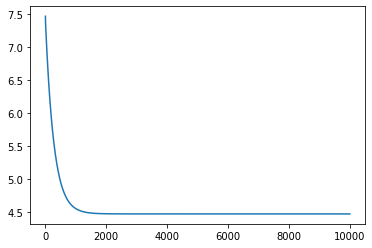

In [ ]:
plt.plot(c) ## Potting  cost funtion. Cost must decrease in each step if our code is impletmented conrrectly.

In [ ]:
theta

array([[-3.8957808 ],
       [ 1.19303364]])

In [ ]:
yp=X.dot(theta)  # This is predicted y for each x
yp

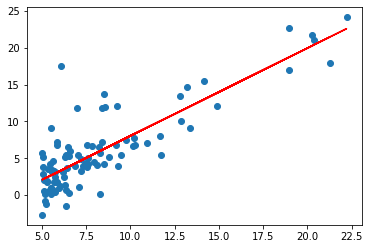

In [ ]:
plt.scatter(data.Visitor_Count,data.Revenue) ## Original data
plt.plot(x,yp,'r-') ##  x versus predicted y in red color

### Prediction for any new instance

In [ ]:
## Making function for prediction
def predict(x):
    theta=np.array([[-3.89578081],[ 1.19303364]])
    X1=np.array([[1,x]])
    yp=X1.dot(theta)
    return yp[0,0]

In [ ]:
predict(20)

19.964891989999995

In [ ]:
import sk... linear regrssion

In [ ]:
lineer=linear regrssion